<header>
    <h1>CA4010 - Data warehousing and Data mining</h1>
    <h2>Continuous assessment project</h2>
</header>
<p>
    For this project, we want to predict if a project submitted to 
    <a href="https://www.indiegogo.com">indiegogo.com</a> will or will not be funded.
    For this purpose, we'll use a
    <a href="https://www.kaggle.com/kingburrito666/indiegogo-project-statistics/data">
    dataset from kaggle containing one year of indiegogo projects.</a>
       The version used here is the version cleaned in part 1 and 2.
</p>
<p>
    This notebook will decribe and show what data visualisation had learned to us about our dataset.
</p>

<h2>Analyze of the continuous attributes</h2>
<p>
    In this part, we'll analyze of the continuous attibutes of our dataset:
        <ul>
            <li><b>collected_percentage</b>: Which is the percentage of fund collected at the end of the project</li>
            <li><b>target_amount</b>: which is the USD value of the fund requested</li>
            <li><b>pledges_count</b>: which is the number of crowdfunders</li>
            <li><b>tagline_len</b>: the number of characters in the tagline</li>
            <li><b>title_len</b>: the number of characters in the title</li>
        </ul>
</p>

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D

In [2]:
indiegogo = pd.read_csv('indiegogo_cleaned_dataset.tsv', sep='\t')

<p>First, we'll look for collected_percentage, target_amount
and pledges_count correlation. We expect that the <b>number of crowdfunders</b> (pledges_count) is strongly correlated with the <b>collected_percentage</b> as we assume that the more people are giving money to a project, the more its chances to succeed increase. We also suspect that the bigger the target_amount is, the less the collected percentage will tend to have very huge values.</p>

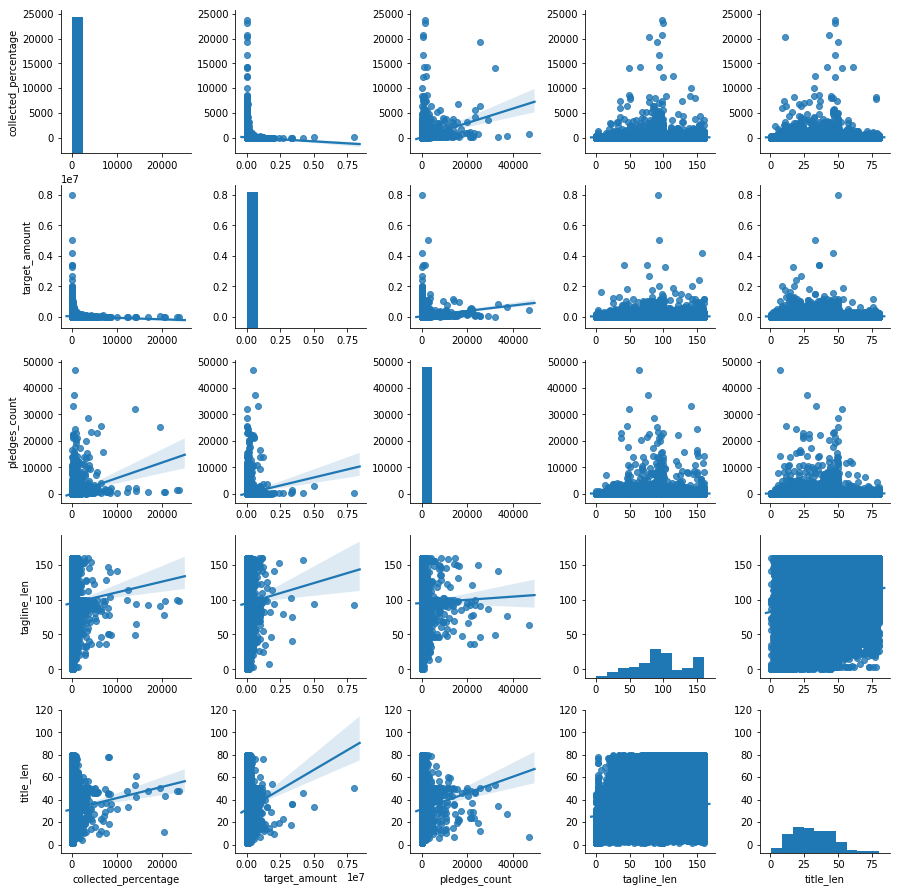

In [3]:
g = sns.PairGrid(indiegogo[["collected_percentage", "target_amount", "pledges_count", "tagline_len", "title_len"]])
g.map_offdiag(sns.regplot) 
g.map_diag(plt.hist) 

<p>With the processed graph we can notice several things:
    <ul>
        <li>The great majority of projects have low values for these attributes and only some of them are very high values. We must check if these projects are outliers or only another type of project which can't be compared to those with lower values.</li>
        <li>The projects with the higher collected percentage are generaly those with the lowest target_amount</li>
        <li>Some projects asks for a huge amount of money (5 to 10 milllions !)</li>
        <li>Surprisngly enough, some projects seems to reach a high collected percentage with very few pledges. This can be due to a very low goal amount.</li>
        <li>pledges_count and collected_percentages are not as closely related as we supposed because the collected_percentage also greately depends on the target_amount. The 3 values are all linked.</li>
        <li>tagline_len anf title_len doesn't seems to be correlated with the succes of a project</li>
    </ul>
  We can see that these 3 attributes are closely related to each other and seems to influence each other greatly. To see it with more detail, it could be interesting to plot a 3D graph of these 3 attributes. 
</p>

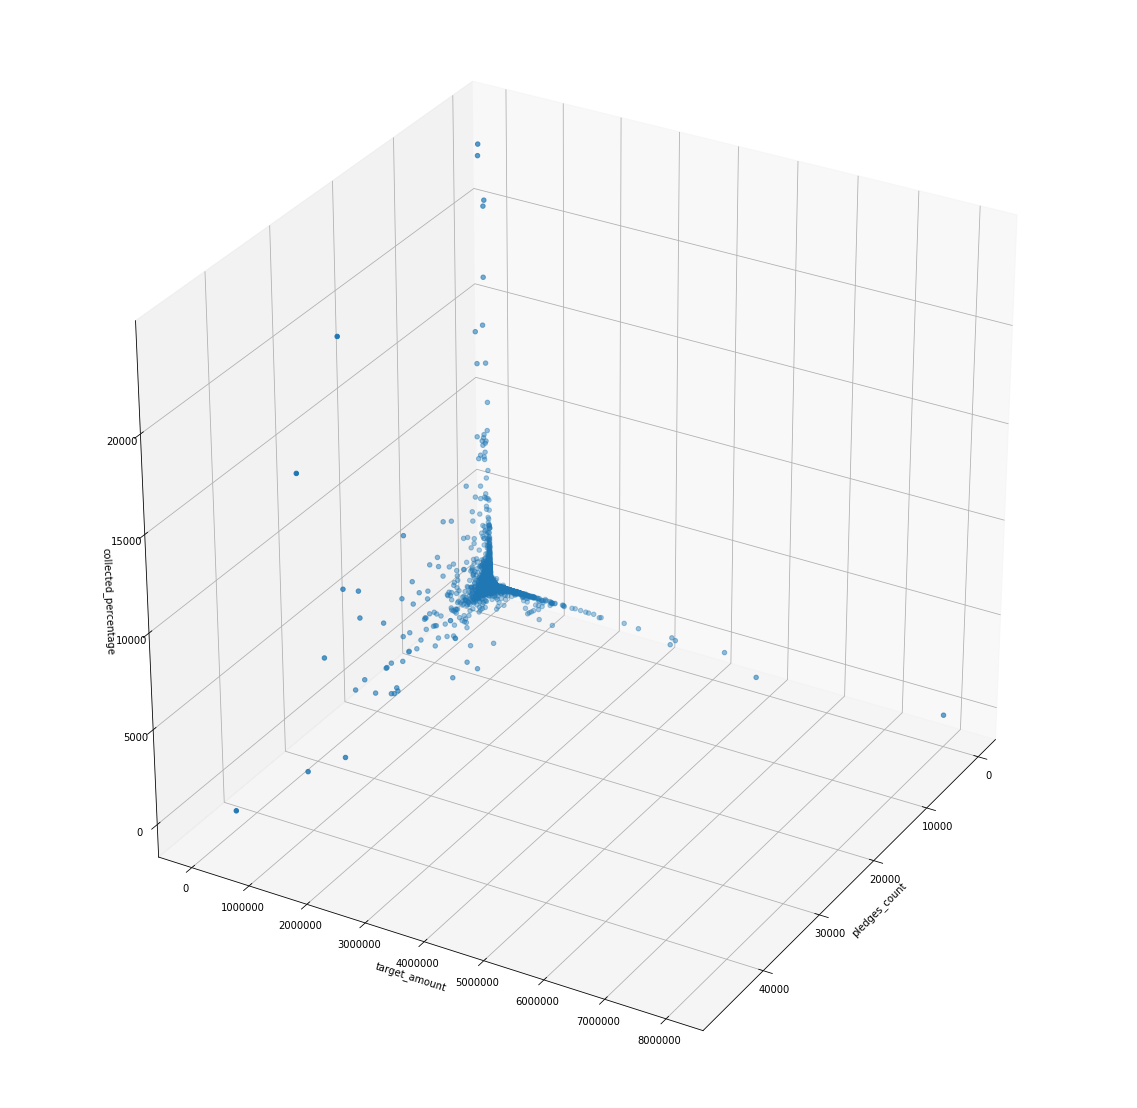

In [4]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.set_ylabel('target_amount')
ax.set_zlabel('collected_percentage')
ax.set_xlabel('pledges_count')
ax.scatter(indiegogo['pledges_count'].values, indiegogo['target_amount'].values,
          indiegogo['collected_percentage'].values)

ax.view_init(30, 30)

<p>Our first hinch was correct: most of the very high collected percentages with very low pledges count are linked to a low target_amount. In fact very high collected percentages occurs always when the target_amount is low. Is it due to crowdfunding projects at 1$ goal ? Let's have a closer look to the projects with low target_amount and high collected percentage.
</p>

In [5]:
indiegogo[indiegogo.collected_percentage > 10000]

,title_len,tagline_len,pledges_count,currency_code,category_slug,collected_percentage,has_partner,target_amount
13899,53,49,32251,USD,community_projects,14063.0,False,5000.127995
25105,42,65,2261,USD,creative_works,14236.0,False,1065.243046
50129,50,91,25378,USD,tech_innovation,19395.0,True,21271.162671
50199,48,98,1516,USD,tech_innovation,23788.0,False,1444.703212
50248,48,100,1564,USD,tech_innovation,23209.0,False,1000.000000
50282,48,93,797,USD,tech_innovation,16757.0,False,1019.018917
50442,48,100,521,USD,tech_innovation,12165.0,False,1134.656802
50503,11,78,716,USD,tech_innovation,20434.0,False,500.004894
50575,61,94,977,USD,tech_innovation,14282.0,False,499.992998
53318,32,141,260,USD,community_projects,10005.0,False,1000.009995


In [6]:
indiegogo.target_amount.min()

300.0

<p>Surprisingly not. The lowest target_amount is <b>62000 USD</b> ! which is not even close to the min value of <b>300 USD</b>. Some projects seems to have few but very generous crowdfunders.</p>

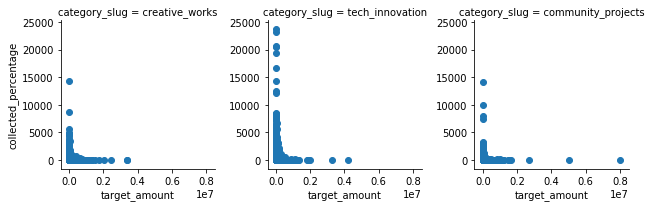

In [7]:
g = sns.FacetGrid(indiegogo, col="category_slug") 
g.map(plt.scatter, "target_amount", "collected_percentage")

<h2>Analyze of the discrete attributes</h2>
<p>
    In this part, we'll analyze of the discrete attibutes of our dataset:
        <ul>
            <li><b>category_slug</b>: Which are the categories of the projects</li>
            <li><b>has_partner</b>: true if the project has a partner, false otherwise</li>
            <li><b>currency_code</b>: which is the original currency code and can give us an overview of projects origins</li>
        </ul>
</p>

<p>First we'll look at the number of projects by categories</p>

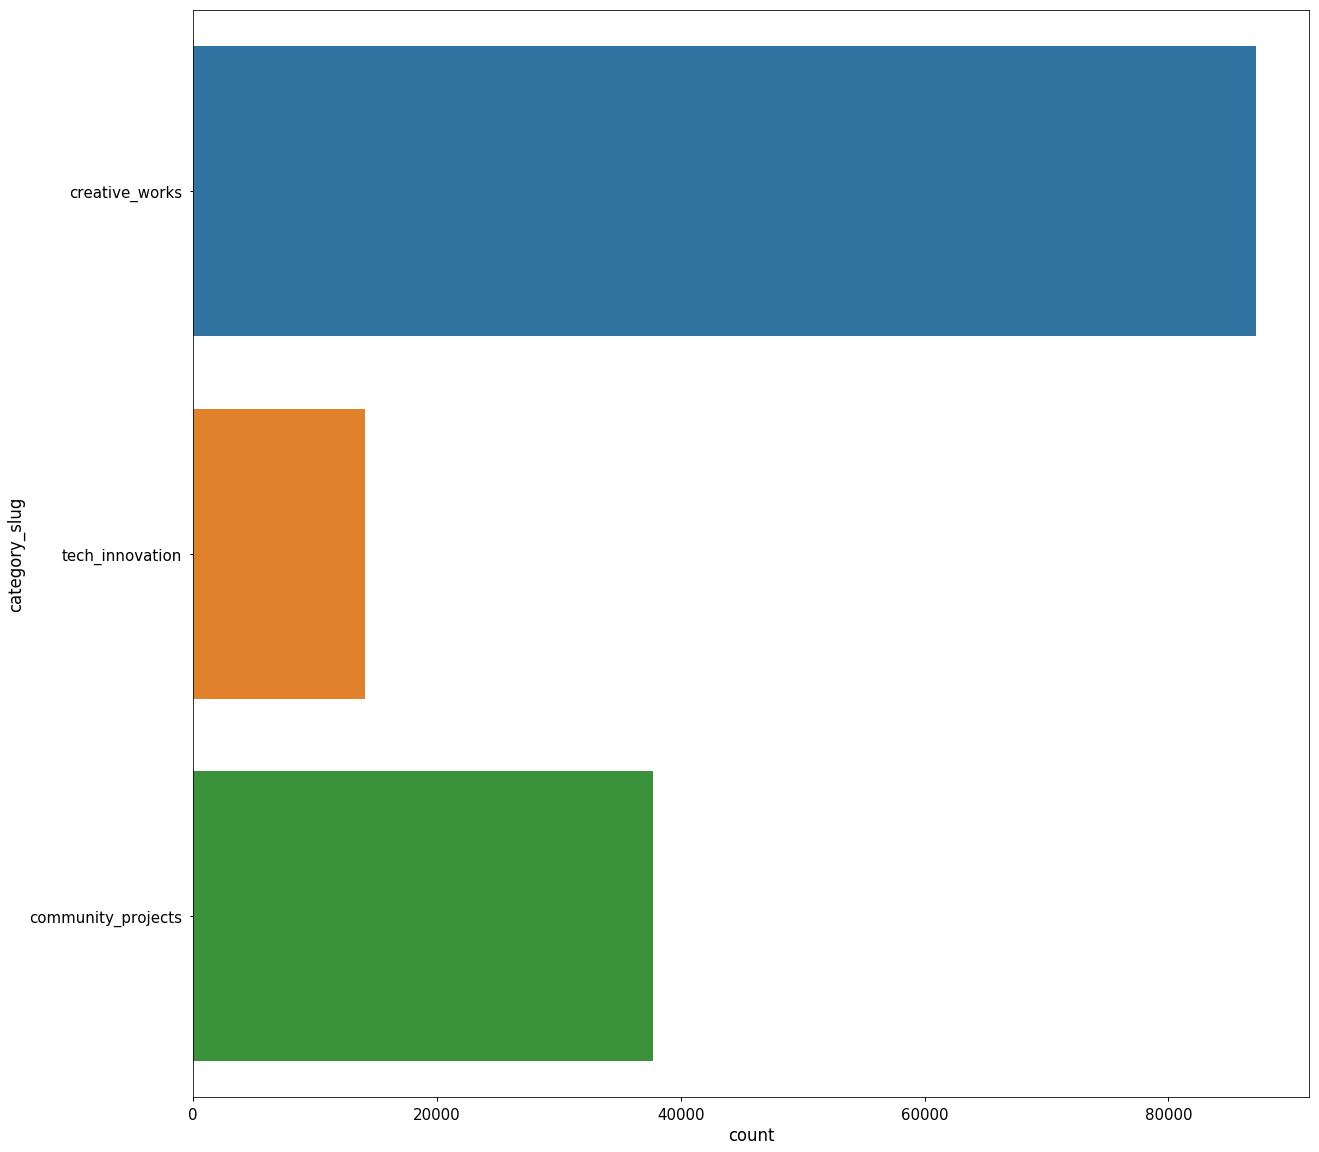

In [8]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(20, 20))
    sns.countplot(y="category_slug", data=indiegogo)

<p>We can see that creative works is the most popular category with more than 80000 projects. This is twice more than the second most popular category !</p>

<p>Let's detail the pledge_count, collected_percentage and targe_amount of each categories</p>

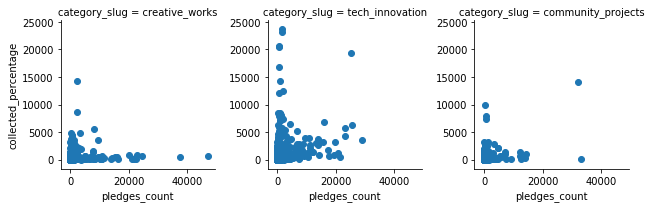

In [9]:
g = sns.FacetGrid(indiegogo, col="category_slug") 
g.map(plt.scatter, "pledges_count", "collected_percentage")

<p>
    We can see that although there is a lot of projects in creative works and that pledges count are very high in lots of projects, most of them doesn't reach ery high collected percentages. Unexpectingly, tech innovations which has the fewest number of projects reach very high collected percentage scores with low pledges count: either the funders give very high sum or the the target amount is very low. We can also notice here projects with very high pledges count and low collected percentages. Most of the community projects seems to have a low participation and a low collected percentages, so although there is a lot of community projects, crowdfunders seems much more interested by tech innovations and creative works.
</p>

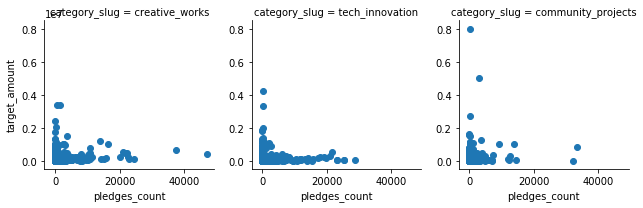

In [10]:
g = sns.FacetGrid(indiegogo, col="category_slug") 
g.map(plt.scatter, "pledges_count", "target_amount")

In [11]:
indiegogo[indiegogo.target_amount > 10000000]

,title_len,tagline_len,pledges_count,currency_code,category_slug,collected_percentage,has_partner,target_amount


<p>We can notice that most of the categories has targets amounts below 2 500 000 USD, and that in most of the cases, people are less interested in funding projects with high target amount. We can also see that a project in phone accessories was very popular and ask for more than 32 millions USD ! (after searching it in the dataset it was a crowdfunding for Ubuntu Edge).</p>

<p>Now, let's analyze the partners. We are expecting to see that a partner is increasing the pleges count and the collected percentage. Let's see our hinch is verified.</p>

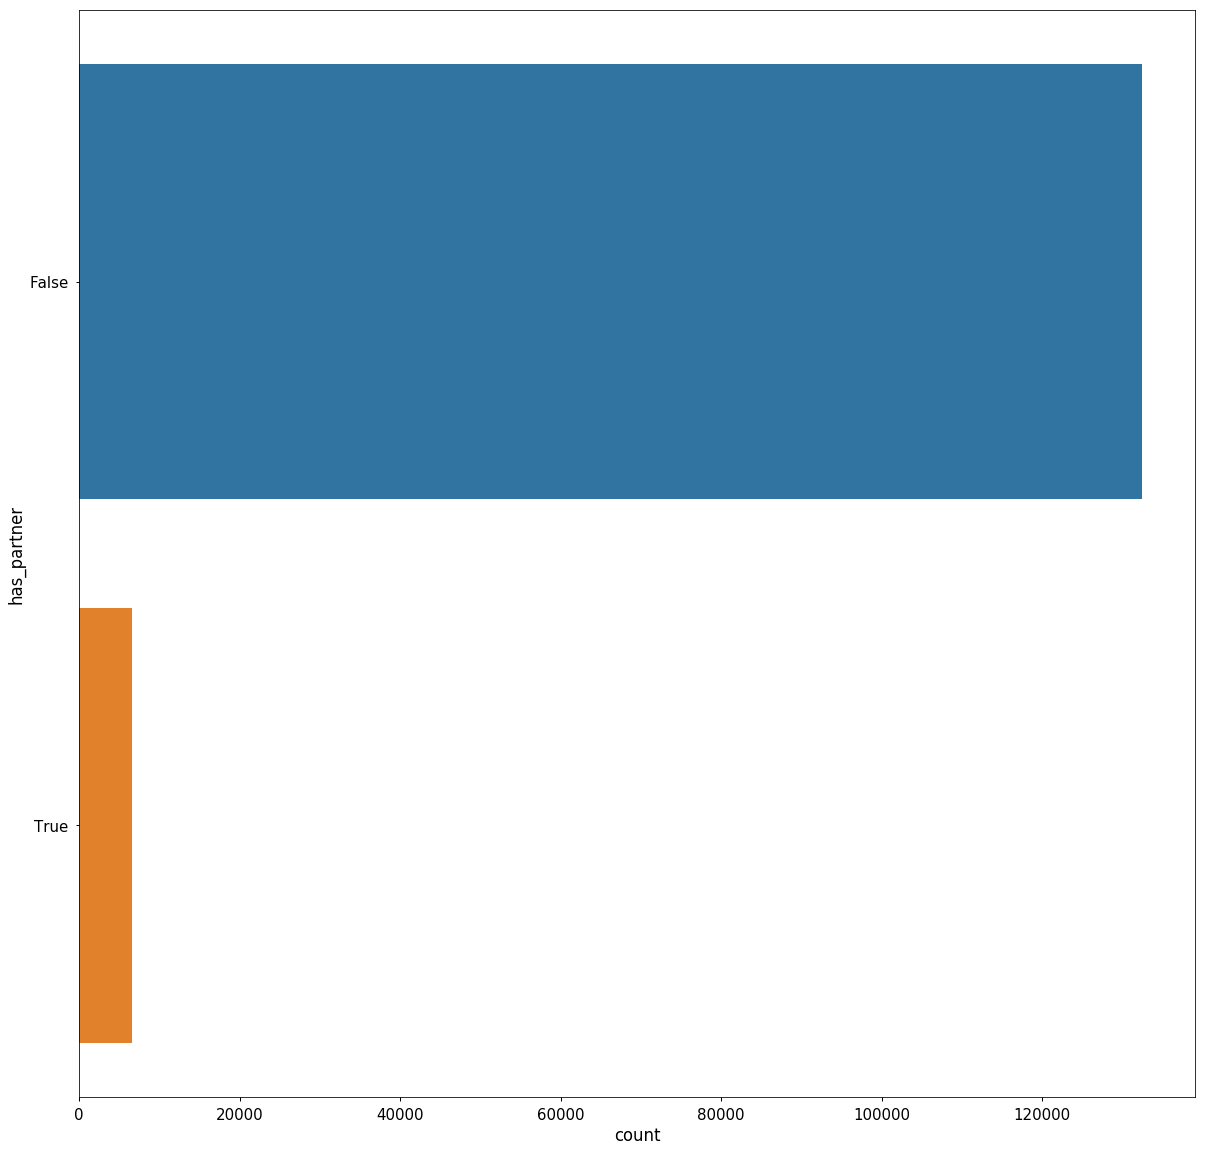

In [12]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(20, 20))
    sns.countplot(y="has_partner", data=indiegogo)

<p>Only few projects, 4.7% in fact, have a partnership, this make very uncertain the assumptions and analyzes done based on the criterion as we don't have a great number of partnership projects to detail.</p>

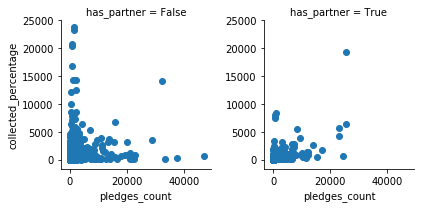

In [13]:
g = sns.FacetGrid(indiegogo, col="has_partner") 
g.map(plt.scatter, "pledges_count", "collected_percentage")

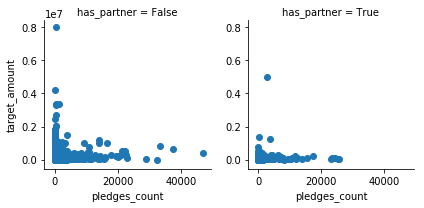

In [14]:
g = sns.FacetGrid(indiegogo, col="has_partner") 
g.map(plt.scatter, "pledges_count", "target_amount")

<p>We can notice that the pledges and amount required doesn't seems to change very much with a partner (we can still notice the Ubuntu project in the second graph). In fact the very high collected percentages with few, generous crowdfunders we've seen in the first part of the analyze doesn't have partnership. Partnership doesn't seems to influence the succes of a project, which is very surprising.</p>

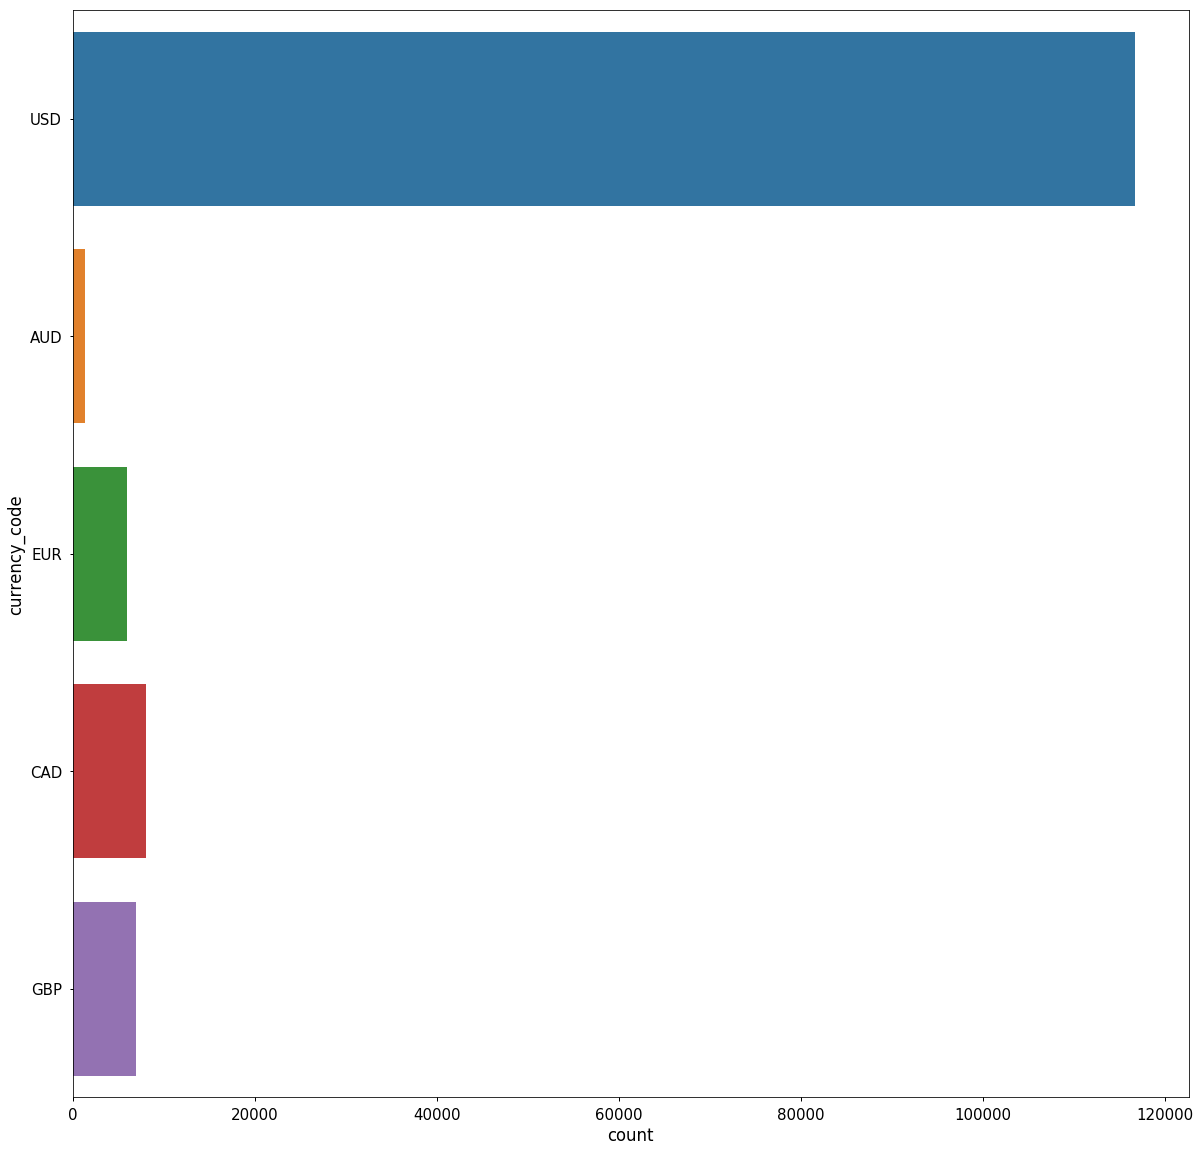

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(20, 20))
    sns.countplot(y="currency_code", data=indiegogo)

<p>Most of the projects seems to be from the USA, or done by people who wanted to have visibility in the USA.</p>